<a href="https://colab.research.google.com/github/pravash21/tweepy_scrapping/blob/master/tweet_graph2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tweepy

In [0]:
import re 
import datetime
import tweepy 
from tweepy import OAuthHandler
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

Syed Imran MBBS MPH
JAS
Asvin Sadhasivuni
surendra shetty
Abhishek Dutt
Shatrunjay Sharan
sarah jacob
Lakshmanan Murugesan
chowkidar krishna
Shikhant aka Choorma
Chowkidar Sunil
Jagat Semwal
Rajesh Pathikonda
Ramesh Chander Goyal
Allergic to Dumb
Allergic to Dumb
David Nicholson
Mangoman
Proud to be an Indian
Fußballgott
Fußballgott
HAL 3rd Stage RWA
rvn
Dinah
The Anachronist
Gulshan


Rate limit reached. Sleeping for: 246
Rate limit reached. Sleeping for: 640
Rate limit reached. Sleeping for: 246


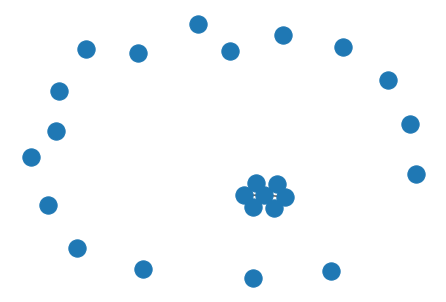

In [12]:
class TwitterClient(object): 
    
    def __init__(self): 
        ''' 
        Class constructor or initialization method. 
        '''
        # keys and tokens from the Twitter Dev Console 
        consumer_key = '9ZT84sMENHGuUtGScMrWvIV9D'
        consumer_secret = 'mvQWO17OvQJEONGR5a96KPbqAPpznLPTzFPi1Ke0pEYh2ULK08'
        access_token = '627369688-A6UECJida7K6jggxbo3DNEN4xCuHdrdpBRm6cxHX'
        access_token_secret = 'dbTp5geakYdj0A27OFEEQNwMvRoB72k3McZ5eijXWZEht'
  
        # attempt authentication 
        try: 
            # create OAuthHandler object 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            self.auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(self.auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True) 
        except: 
            print("Error: Authentication Failed") 
  
    def get_tweets(self, query, count = 10): 
        
        tweets = [] 
  
        try: 
            # call twitter api to fetch tweets 
            fetched_tweets = self.api.search(q = query, count = count) 
            req_tweets=[]
            startDate = datetime.datetime(2019, 4, 28, 0, 0, 0)
            endDate =   datetime.datetime(2019, 4, 29, 0, 0, 0)
            for t in fetched_tweets:
                if(t.created_at < endDate and t.created_at > startDate):
                  print(t.user.name)
                  req_tweets.append(t)
            follow=[[]]*len(req_tweets)
            followin=[[]]*len(req_tweets)
            for i in range(len(req_tweets)): 
                tweet=req_tweets[i]
                foll=self.api.followers(tweet.user.id)
                
                for f in foll:
                    follow[i].append(f.id)
                folli=self.api.friends(tweet.user.id)
                for f in folli:
                    followin[i].append(f.id)
            graph = nx.Graph()
            for i in range(len(req_tweets)):
              graph.add_node(req_tweets[i].user.id)
            for i in range(len(req_tweets)):
              tw=req_tweets[i]
              for j in range(i+1,len(req_tweets)):
                z=req_tweets[j]
                if(z.user.id in follow[i]):
                  graph.add_edge(tw.user.id,z.user.id)
                if(z.user.id in followin[i]):
                  graph.add_edge(z.user.id,tw.user.id)
            # Listing the users which are connected to each user
            
            nx.draw(graph)
            plt.savefig("graph.png")
            plt.show()
  
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 
def main(): 
    # creating object of TwitterClient Class 
    api = TwitterClient() 
    
    
    tweets = api.get_tweets(query = 'Air Pollution in Delhi', count = 200) 

if __name__ == "__main__": 
    # calling main function 
    main() 